# p-Values & Hypotheses

* Hypotheses:
    - $H_0$
    - $H_a$
* p-values: how strange things are if $H_0$ is true
* $\alpha$: critical value, when can we reject $H_0$

# Effect Size

Used in Meta-Analysis to compare multiple studies

## misclassification rate
Can calculate a threshold to hold two populations against (where 2 PDFs cross):

$$\frac{\sigma_1 \mu_2 + \sigma_2 \mu_1}{\sigma_1 + \sigma_2}$$

Then use this to calculate the overlap (AUC) of the PDFs

## probability of superiority

portion/probability that values from one sample are larger than the other sample

## Cohen's d statistic

Pooled Variance:

$$ \sigma^2_{pooled} = \frac{\sigma^2_1 n_1 + \sigma^2_2 n_2}{n_1 + n_2}$$

Cohen's d statistic

$$ d = \frac{\mu_1 - \mu_2}{\sigma_{pooled}} $$

### Rule of Thumb for d statistic

>**Small effect = 0.2**
>
>**Medium Effect = 0.5**
>
>**Large Effect = 0.8**

## Bringing it all together

In [1]:
# Summary of functions found in curriculum: 
# https://github.com/learn-co-students/dsc-2-20-05-effect-sizes-online-ds-sp-000

import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values


def overlap_superiority(group1, group2, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority


def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)

0.1
overlap 1.074
superiority 0.457


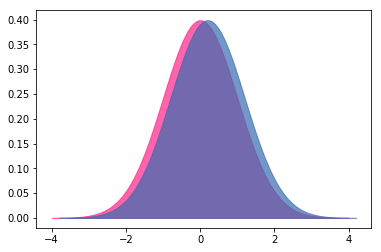

In [4]:
plot_pdfs(cohen_d=0.2)

0.25
overlap 1.221
superiority 0.337


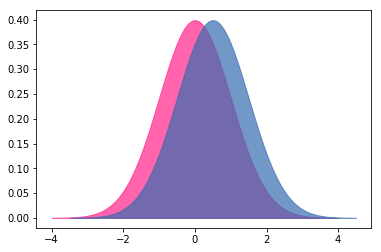

In [5]:
plot_pdfs(cohen_d=1)

2.0
overlap 1.957
superiority 0.002


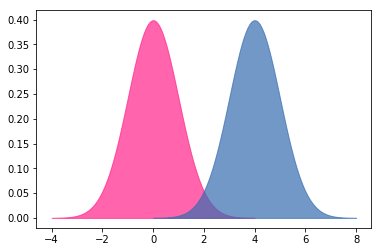

In [7]:
plot_pdfs(cohen_d=4.0)

# t-Test

## One Sample
https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-20-hypothesis-and-ab-testing/one-sample-t-test-lab

## Two Sample
https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-20-hypothesis-and-ab-testing/two-sample-t-test-lab

# Errors

https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-20-hypothesis-and-ab-testing/type-1-and-type-2-errors

https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-20-hypothesis-and-ab-testing/type-1-and-type-2-errors-lab

## Type 1 & 2

# Statistical Power

https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-20-hypothesis-and-ab-testing/statistical-power